In [1]:
# 딥러닝 응용
# 이미지분류 , 오토인코더, 전이학습, 자연어처리, 시계열 분석

In [2]:
# Fashion MNIST  - CNN  28x28   10가지 클래스

In [3]:
import pandas as pd
import numpy as np
import tensorflow as tf
import random

In [4]:
# 랜럼시드 고정
SEED = 12
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)

In [5]:
# 데이콘에 있는 데이터를 가져온다.
drive_path = './FM/data/'
train = pd.read_csv(drive_path+'train.csv')
test = pd.read_csv(drive_path+'test.csv')
submission = pd.read_csv(drive_path+'sample_submission.csv')
train.shape, test.shape, submission.shape

((60000, 786), (10000, 785), (10000, 2))

In [6]:
28*28

784

In [7]:
train.head()

,index,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,9,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,6,0,0,0,0,0,0,0,5,...,0,0,0,30,43,0,0,0,0,0
3,3,0,0,0,0,1,2,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,4,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [42]:
train.loc[:,'pixel1':].values.min(), train.loc[:,'pixel1':].values.max()
x_train = train.loc[:,'pixel1':]
y_train = train.loc[:,'label']

In [43]:
# 주어진 데이터는 784개의 1차원 벡터
# 이미지로 표현  28*28 2차원 벡터
train_images =  x_train.values.reshape(-1,28,28)
train_images.shape

(60000, 28, 28)

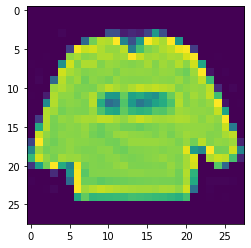

In [44]:
# 첫번째 이미지 출력
import matplotlib.pyplot as plt
plt.imshow(train_images[0])
plt.show()

In [45]:
train['label'].value_counts() # 0 ~ 9

2    6000
9    6000
6    6000
0    6000
3    6000
4    6000
5    6000
8    6000
7    6000
1    6000
Name: label, dtype: int64

In [46]:
target_value = {
0 : 'T-shirt/top',
1 : 'Trouser',
2 : 'Pullover',
3 : 'Dress',
4 : 'Coat',
5 : 'Sandal',
6 : 'Shirt',
7 : 'Sneaker',
8 : 'Bag',
9 : 'Ankle boot'
}

In [47]:
target_value[9]

'Ankle boot'

In [48]:
test.head()

,index,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,3,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
test_images =  test.loc[:,'pixel1':].values.reshape(-1,28,28)
test_images.shape

(10000, 28, 28)

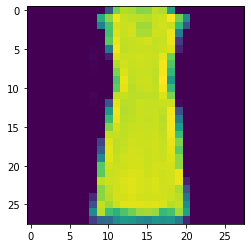

In [50]:
plt.imshow(test_images[499])

In [51]:
#  스케일 맞추기
x_train =  train_images / 255
x_test = test_images / 255
x_train.min(), x_train.max(), x_test.min(), x_test.max()

(0.0, 1.0, 0.0, 1.0)

In [52]:
# 합성곱 CNN은 RGB의 채널값을 입력받은 것을 전재로 설계
x_train.shape

(60000, 28, 28)

In [53]:
x_train = x_train.reshape(60000,28,28,-1)
x_train.shape

(60000, 28, 28, 1)

In [54]:
x_test = np.expand_dims(x_test,axis=-1)
x_test.shape

(10000, 28, 28, 1)

In [57]:
# # 데이터 분할.... 교차검증도 고려해서  0.2
# stratify 옵션은 정답의 빈도수를 적절하게 섞어서. 
from sklearn.model_selection import train_test_split
x_tr,x_val,y_tr,y_val=train_test_split(x_train, y_train, test_size = 0.2, stratify=y_train,random_state=42)